In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from reliability.Fitters import Fit_Weibull_Mixture, Fit_Weibull_2P, Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram, make_right_censored_data

In [2]:
years = np.arange(2002,2022,1)       # 2002 - 2021   

dist_shapes1 = np.zeros(len(years))
dist_scales1 = np.zeros(len(years))
dist_shapes2 = np.zeros(len(years))
dist_scales2 = np.zeros(len(years))
mostfreq_speeds = np.zeros(len(years))

In [12]:
mostfreq_speeds

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.78728571, 0.        , 0.        ])

# Read in wind data

In [4]:
year = '2019'
height = '10m'
subset = ['MST', f'Avg Wind Speed @ {height} [m/s]', f'Avg Wind Direction @ {height} [deg]', 'Temperature @ 50m [deg C]', 'Relative Humidity [%]']
df = pd.read_csv(f'{year}_data.csv', usecols=lambda x: x in subset)
df = df.rename(columns={f'Avg Wind Speed @ {height} [m/s]': 'Speed', f'Avg Wind Direction @ {height} [deg]': 'Direction', 'Temperature @ 50m [deg C]': 'Temperature', 'Relative Humidity [%]': 'Humidity'})

# Just the first 1000 for fast testing
# df = df.iloc[0:3000]
print(df)

        MST  Speed  Direction  Temperature  Humidity
0         0  0.276       99.3       -16.97     74.66
1         1   0.64       97.1       -16.97     74.74
2         2  0.697       99.6       -16.95     74.45
3         3  0.722       98.3       -16.96     74.72
4         4  0.704      100.8       -16.94     74.19
...     ...    ...        ...          ...       ...
390452  332  1.193      22.97         9.36      88.3
390453  333  0.295      325.4          9.4      89.5
390454  334   0.88      231.1         9.33      90.5
390455  335  0.531      251.8         9.27        89
390456  336  0.275      70.51         9.22      89.3

[390457 rows x 5 columns]


# Plot wind distribution over the year

In [ ]:
# sns.set_style("darkgrid")
# plt.bar(df['MST'],df['Speed'], edgecolor='#00008B')
# plt.tick_params(axis='x', labelsize= 10)
# plt.xticks(np.arange(0, 1440, 150))
# plt.xlabel('Hour-MST',fontsize=15)
# plt.ylabel('Avg Wind Speed @ 10m [m/s]',fontsize=15)
# plt.title(f'Minutely Wind Speeds in {year}',fontsize=15)
# plt.tight_layout()
# #plt.savefig(f'{year}_{height}.pdf')
# plt.show()

### Most frequent windspeed

array([1.78728571])

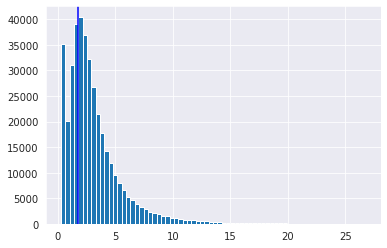

In [6]:
sns.set_style("darkgrid")
y, x, _ = plt.hist(df['Speed'], bins=70);
plt.axvline(x = x[np.where(y == y.max())], color = 'b', label = 'max');
mostfreq_speeds[int(year)-2002] = x[np.where(y == y.max())]
x[np.where(y == y.max())] # most frequent speed

In [ ]:
# from reliability.Distributions import Weibull_Distribution
# from reliability.Fitters import Fit_Weibull_3P
# from reliability.Other_functions import make_right_censored_data, histogram
# import matplotlib.pyplot as plt

# a = 30
# b = 2
# g = 20
# threshold=55
# dist = Weibull_Distribution(alpha=a, beta=b, gamma=g) # generate a weibull distribution
# raw_data = dist.random_samples(500, seed=2)  # create some data from the distribution
# data = make_right_censored_data(raw_data,threshold=threshold) #right censor some of the data
# print('There are', len(data.right_censored), 'right censored items.')
# wbf = Fit_Weibull_3P(failures=data.failures, right_censored=data.right_censored, show_probability_plot=False, print_results=False)  # fit the Weibull_3P distribution
# print('Fit_Weibull_3P parameters:\nAlpha:', wbf.alpha, '\nBeta:', wbf.beta, '\nGamma', wbf.gamma)
# histogram(raw_data,white_above=threshold) # generates the histogram using optimal bin width and shades the censored part as white
# dist.PDF(label='True Distribution')  # plots the true distribution's PDF
# wbf.distribution.PDF(label='Fit_Weibull_3P', linestyle='--')  # plots to PDF of the fitted Weibull_3P
# plt.title('Fitting comparison for failures and right censored data')
# plt.legend()
# plt.show()

## Fitting samples to a distribution

In [7]:
df['Speed'].sample(n=10_000, random_state=1)

101801   1.092
124131   0.338
289941   2.258
104309   3.103
249869   3.572
          ... 
300191   1.264
202314   3.512
353040    4.12
73097    1.014
38327     8.03
Name: Speed, Length: 10000, dtype: float64

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 50000/0 (0% right censored) 

   Distribution   Alpha    Beta    Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS       Mu    Sigma   Lambda  Log-likelihood   AICc    BIC      AD   optimizer
Weibull_Mixture                          2.73893 2.34546 3.81124 1.20979     0.422246                                       -101455 202920 202964 50.5328         TNC
     Weibull_3P 2.97711 1.14737 0.246747                                                                                    -101517 203040 203067 529.089         TNC
 Exponential_2P                   0.2749                                                                   0.355263         -101745 203494 203511 1506.76         TNC
       Gamma_3P  2.1585 1.33543 0.207186                                                                                    -101745 203496 203522 422.848         TNC
       Gamma_2P 1.72303 1.79319                                

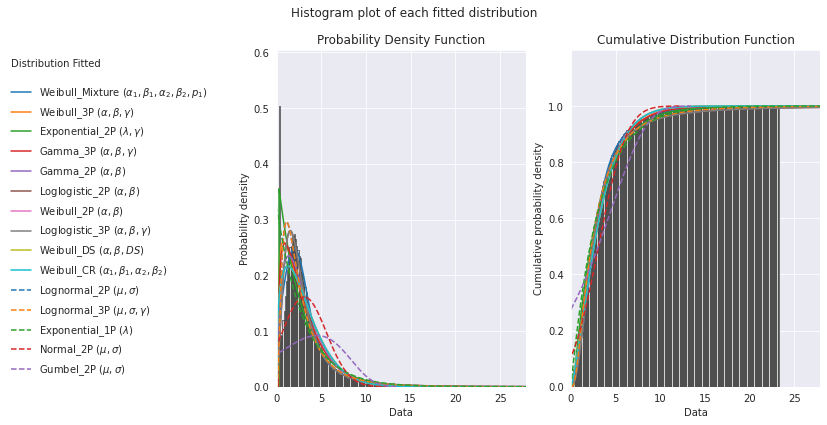

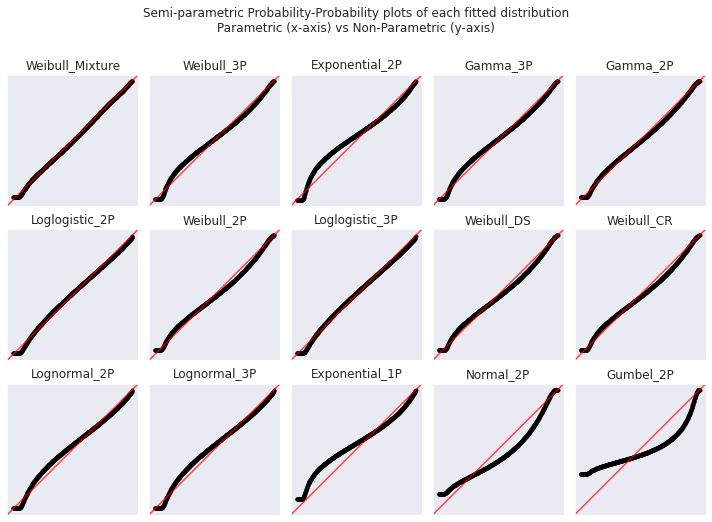

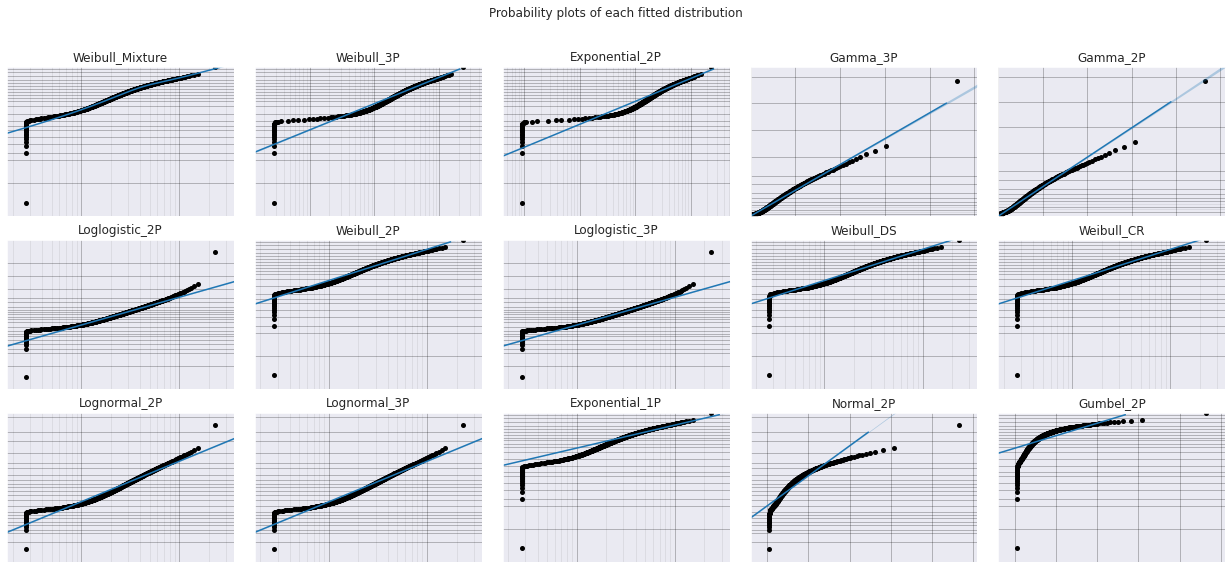

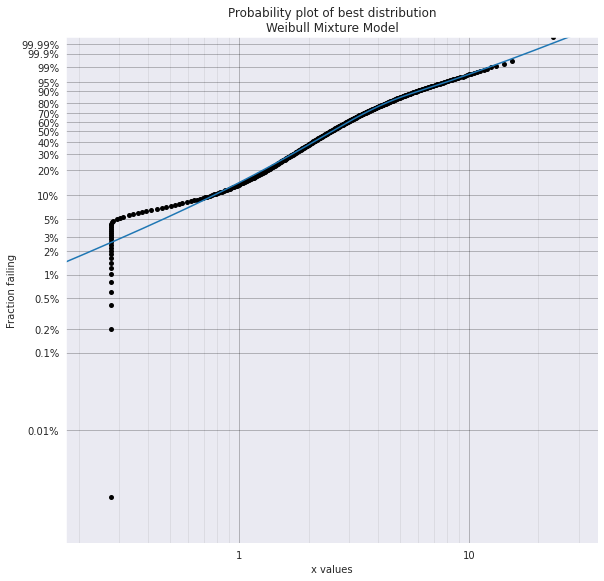

In [8]:
speeds_sample = list(df['Speed'].sample(n=50_000, random_state=1))
Fit_Everything(failures= speeds_sample, show_histogram_plot=True, show_probability_plot=True, 
               show_PP_plot=True, show_best_distribution_probability_plot=True)
# All plots are ordered based on the goodness of fit order of the results. For the histogram this is reflected in the order of the legend. 
# For the probability plots and PP plots, these are ordered from top left to bottom right.
# https://reliability.readthedocs.io/en/latest/Fitting%20all%20available%20distributions%20to%20data.html

In [14]:
results = Fit_Weibull_Mixture(failures=speeds_sample, show_probability_plot=False, print_results=False);

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 50000/0 (0% right censored) 

   Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
     Alpha 1         2.73893       0.0181865   2.70352   2.77481
      Beta 1         2.34546       0.0713405   2.20972   2.48954
     Alpha 2         3.81124       0.0411389   3.73145   3.89273
      Beta 2         1.20979      0.00747404   1.19523   1.22453
Proportion 1        0.422246       0.0186336  0.386212  0.459128 

Goodness of fit   Value
 Log-likelihood -101455
           AICc  202920
            BIC  202964
             AD 50.5328 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 50000/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         3.38791       0.0118031   3.36485   3.41112
     Beta         1.35638      

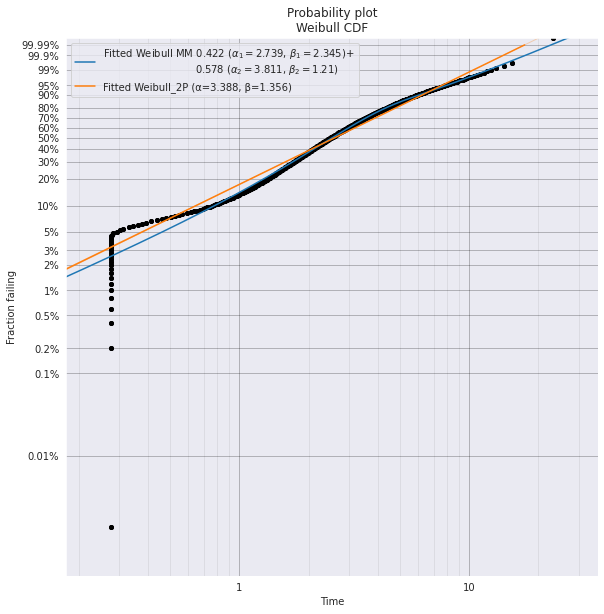

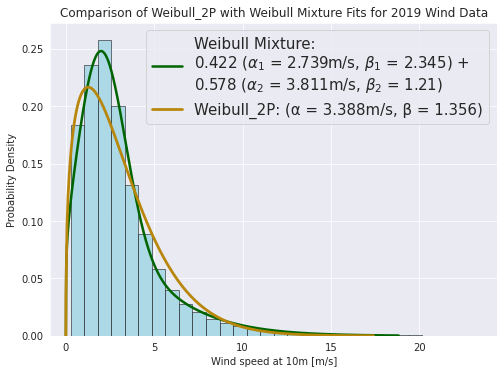

In [10]:
# fit the Weibull Mixture and Weibull_2P
mixture = Fit_Weibull_Mixture(failures=speeds_sample, show_probability_plot=True, print_results=True)
single = Fit_Weibull_2P(failures=speeds_sample, show_probability_plot=True, print_results=True)
print('Weibull_Mixture BIC:', mixture.BIC, '\nWeibull_2P BIC:', single.BIC) # print the goodness of fit measure

a1, a2, b1, b2, p1, p2 = mixture.alpha_1, mixture.alpha_2, mixture.beta_1, mixture.beta_2, mixture.proportion_1, mixture.proportion_2
a, b = single.alpha, single.beta

# plot the Mixture and Weibull_2P
plt.figure(figsize=(8, 6))
histogram(speeds_sample, white_above=30, bins=30, color="lightblue")
mixture.distribution.PDF(label=f'Weibull Mixture: \n{round(p1,3)} ($α_1$ = {round(a1,3)}m/s, $β_1$ = {round(b1,3)}) +\n{round(p2,3)} ($α_2$ = {round(a2,3)}m/s, $β_2$ = {round(b2,3)})', 
    color="darkgreen",linewidth=2.5)
single.distribution.PDF(label=f'Weibull_2P: (α = {round(a,3)}m/s, β = {round(b,3)})', color="darkgoldenrod",linewidth=2.75)
plt.title(f'Comparison of Weibull_2P with Weibull Mixture Fits for {year} Wind Data')
plt.xlabel(f"Wind speed at {height} [m/s]")
plt.ylabel("Probability Density")
plt.legend(prop={'size': 15}, loc='best')
plt.savefig(f'{year}_{height}_dist_models.pdf')
plt.show()

## Plotting the best fit curve on the histogram

Shape parameters: k_1 = 2.3455, k_2 = 1.2098 and Scale parameters: λ_1 = 2.7389m/s, λ_2 = 3.8112m/s
The most frequent windspeed in 2019 was [1.78728571]


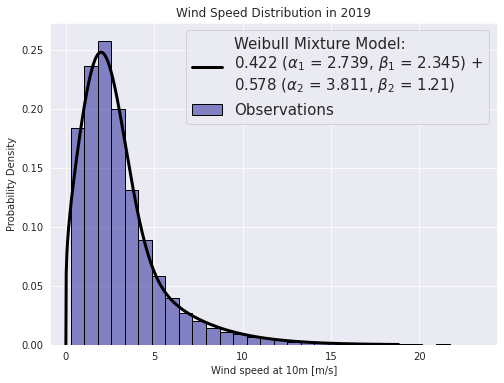

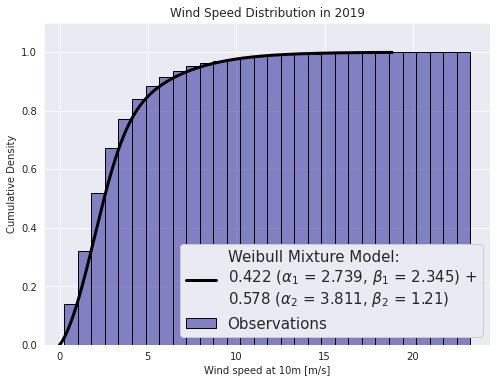

In [11]:
sns.set_style("darkgrid")

plt.figure(figsize=(8, 6))
sns.histplot(
    speeds_sample, kde=False, bins=30,color = 'darkblue',
    stat="density", kde_kws=dict(cut=3), label="Observations",
    alpha=.45, edgecolor='black') 
results.distribution.PDF(color="black",linewidth=3, label=f'Weibull Mixture Model: \n{round(p1,3)} ($α_1$ = {round(a1,3)}, $β_1$ = {round(b1,3)}) +\n{round(p2,3)} ($α_2$ = {round(a2,3)}, $β_2$ = {round(b2,3)})')
plt.xlabel(f"Wind speed at {height} [m/s]")
plt.ylabel("Probability Density")
plt.legend(loc="upper right",prop={'size': 15}) 
plt.title(f"Wind Speed Distribution in {year}")
plt.savefig(f'{year}_{height}_pdfdist.pdf')

plt.figure(figsize=(8, 6))
sns.histplot(
    speeds_sample, kde=False, bins=30,color = 'darkblue',
    stat="density", cumulative=True, kde_kws=dict(cut=3), 
    label="Observations",alpha=.45, edgecolor='black') 
results.distribution.CDF(color="black",linewidth=3, label=f'Weibull Mixture Model: \n{round(p1,3)} ($α_1$ = {round(a1,3)}, $β_1$ = {round(b1,3)}) +\n{round(p2,3)} ($α_2$ = {round(a2,3)}, $β_2$ = {round(b2,3)})')
plt.xlabel(f"Wind speed at {height} [m/s]")
plt.ylabel("Cumulative Density")
plt.legend(loc="best",prop={'size': 15},fancybox=True, framealpha=1) 
plt.title(f"Wind Speed Distribution in {year}")
plt.savefig(f'{year}_{height}_cdfdist.pdf')


print(f'Shape parameters: k_1 = {round(b1,4)}, k_2 = {round(b2,4)} and Scale parameters: λ_1 = {round(a1,4)}m/s, λ_2 = {round(a2,4)}m/s')
print(f'The most frequent windspeed in {year} was {x[np.where(y == y.max())]}')

dist_shapes1[int(year)-2002]=b1
dist_shapes2[int(year)-2002]=b2
dist_scales1[int(year)-2002]=a1
dist_scales2[int(year)-2002]=a2